> 용어 정리[ref_1](http://www.incodom.kr/FASTQ),[ref_2](https://bioinfoblog.tistory.com/70)

----

- FASTQ format
  - 'AGCT'로 표현되는 생물학적 sequence와 아스키 코드(ASCII)로 표시된 각 염기에 대한 phred quality score를 모두 저장하기 위한 Text-based format
    - Phred quailty score : 자동화된 DNA 시퀀싱에 의해 생성된 핵염기 식별 품질의 척도
  - FASTQ format은 원래 FASTA 형식의 sequence와 quality data를 묶기 위해 개발되었지만, 최근에는 Illumina Genome Analyzer와 같은 높은 처리량 sequencing 기기의 출력을 저장하기 위한 실질적인 표준으로 자리잡음
    - FASTA format :  염기서열 혹은 단백질서열을 문자열로 표현한 것
  - Quality score는 일반적으로 2 ~ 40 범위에 있는 정수 (Q)이지만, 더 높은 값과 더 낮은 값을 사용하는 경우도 있으며, 특히 Illumina platform의 1.8v이상에서는 Q 점수가 최대 41까지 reads가 생성됨

---

- composition of FASTQ
  - 1번 라인 : '@' 문자로 시작, sequence identifier와 선택적 description (FASTA 제목 line과 같은)으로 구성. 이 헤더는 유니크한 정보를 가지고 있음.
  - 2번 line은 sequence letter.
  - 3번 line은 '+' 문자로 시작하고, 선택적으로 동일한 sequence identifier가 다시옴.
  - 4번 line은 각 sequence에 대한 quality 값을 아스키 코드로 인코딩하며, sequence 문자와 동일한 수의 기호를 포함해야함.
  - 아래는 그 예시이다. 

```
@SEQ_ID
Sequence
+
Quality scores
```
  - 좀 더 구체적인 예시는 아래와 같다.
  ```
  @HWUSI-EAS100R:6:73:941:1973#0/1
GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTT
+HWUSI-EAS100R:6:73:941:1973#0/1
!''*((((***+))%%%++)(%%%%).1***-+*''))**55CCF>>>>>>CCCCCCC65
```

> ? sequence identifier

    demultiplexing할 때, barcode로 분리한다고 했었는데, 이때 이 sequence identifier가 unique한 barcode 역할?
    

> ? 4번 라인에 대해서

    각 sequence에 대한 quality 값을 아스키 코드로 인코딩한다고 했는데, 각 sequence에 대한 quality라는 게 뭔지?
    
    A quality value Q is an integer representation of the probability p that the corresponding base call is incorrect.
    
    품질 값 Q는 해당 베이스 콜이 올바르지 않을 확률의 정수 표현
    
    Phred score가 크면 클수록 맞을 확률이 높다.
    
    그런데, 맞을 확률이 높다?
    뭐가 맞을 확률?
    
    뭐랑 뭐를 대조해서 맞을 확률?....

- 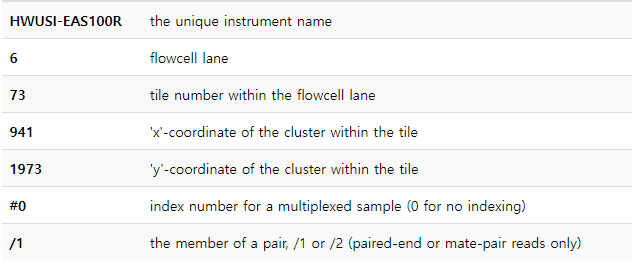

> ! HWUSI-EAS100R

    the unique instrument name
    : 추출된 sequence파일이 어떤 회사의 어떤 장비에서 추출된 것인지..

> ? 941, 1973, #0, /1

    ?

- flowcell lane : 보통 8 lane으로 구성되어 있음1
- tile number : 하나의 lane에는 총 96개의 tile이 존재함
- 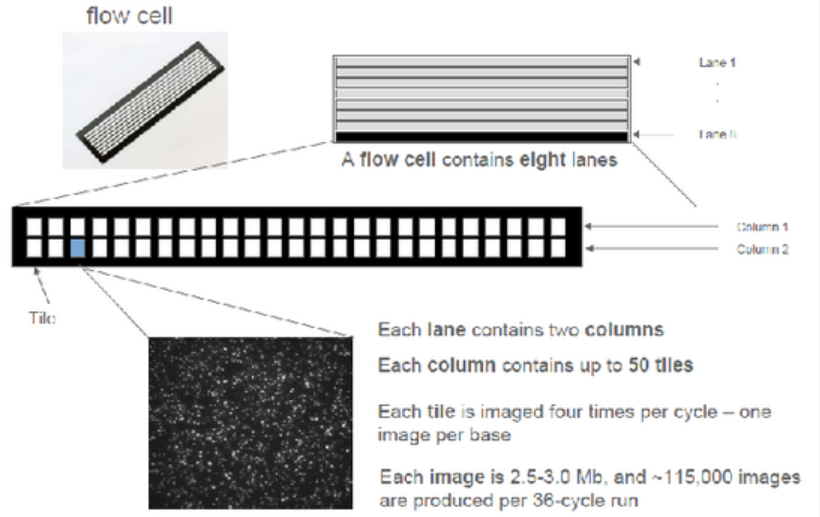

---

- FASTQ 보는 방법
  - FASTQ 파일은 .fastq.gz 확장자로 압축되어 생성
  - 최대 수백만 개의 항목을 포함할 수 있으며 크기가 몇 메가바이트 또는 기가바이트가 될 수 있기 때문에 보통 텍스트 편집기에서 열기에는 무리가 있음 
  - 따라서 큰 파일을 처리할 수 있는 텍스트 편집기 또는 명령줄을 통해 대용량 파일을 볼 수 있는 Unix 또는 Linux 시스템에 엑세스해야 함.

---

- data files (artifacts와 visualizations)
  - Artifacts(.qza)와 Visualizations(.qzv)로 구분됨
  - Artifacts는 data와 metadata를 포함하는 것으로, 일반적인 data에서 artifacts로의 importing, artifacts에서 data로의 exporting이 가능함.
    - 여기서 말하는 일반적인 data ?
  - Visualizations는 최종 결과물로서, 시각적으로 데이터를 확인할 수 있는 파일
  - https://view.qiime2.org에서 데이터를 쉽게 확인해볼 수 있다.

- Semantic types
  - Artifiacts는 고유의 semantic types를 가지고 있는데, 어떤 분석에 사용되는 artifacts인지 나타내주는 라벨이라고 생각하면 된다.
  - 예를 들어, distance matrix를 input으로 받는 분석의 경우, distance matrix를 semantic types으로 갖는 artifacts가 input으로 들어간다.

- Plugins
  - 각 상황에 맞는 플러그인을 설치해서 분석을 진행할 수 있다.
  - 플러그인에는 method와 visualizer가 정의되어 있다.
  - method는 artifacts와 parameters를 받아서 새로운 artifacts(한개 이상)를 반환한다.
  - Visualizer는 artifacts와 parameters를 받아서 하나의 visualization을 반환한다.